<a href="https://colab.research.google.com/github/draculess99/Tensorflow2/blob/master/Section4_TRY_HOMEWORK_SOLUTION_Building_a_Convolutional_Neu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.14.0'

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


In [0]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

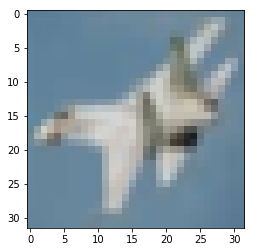

In [7]:
plt.imshow(X_test[10])

In [0]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

W0705 05:08:30.446558 140495790823296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [23]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 8s 155us/sample - loss: 0.0976 - sparse_categorical_accuracy: 0.9661
Epoch 2/15
50000/50000 [==============================] - 8s 153us/sample - loss: 0.0947 - sparse_categorical_accuracy: 0.9683
Epoch 3/15
50000/50000 [==============================] - 8s 154us/sample - loss: 0.0981 - sparse_categorical_accuracy: 0.9669
Epoch 4/15
50000/50000 [==============================] - 8s 154us/sample - loss: 0.0907 - sparse_categorical_accuracy: 0.9693
Epoch 5/15
50000/50000 [==============================] - 8s 153us/sample - loss: 0.0899 - sparse_categorical_accuracy: 0.9704
Epoch 6/15
50000/50000 [==============================] - 8s 153us/sample - loss: 0.0870 - sparse_categorical_accuracy: 0.9716
Epoch 7/15
50000/50000 [==============================] - 8s 154us/sample - loss: 0.0829 - sparse_categorical_accuracy: 0.9725
Epoch 8/15
50000/50000 [==============================] - 8s 153us/sample - loss: 0.0846 - sparse_categorical_a

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 85us/sample - loss: 1.7998 - sparse_categorical_accuracy: 0.7209


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7208999991416931
